## Kelompok
1. Alief Cahyo Utomo
2. Agastya
3. Irfan Eka

## Perbadingan Naive Bayes, Decicion Tree, dan KNN
- Akurasi
- Peforma

In [40]:
# Import libraries
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [42]:
# Split data to predict and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("predict size, ", len(X_test))
print("Test size, ", len(X_test))
np.unique(y_test, return_counts=True)

predict size,  30
Test size,  30


(array([0, 1, 2]), array([10, 10, 10]))

In [43]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Mutinominal Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy MNB : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy GNB : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy KNN : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
   

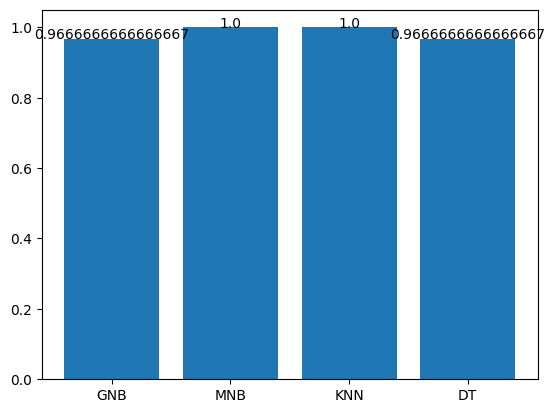

In [44]:
# Make predictions
y_pred_mnb = mnb.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

# MNB
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print('Accuracy MNB :', accuracy_mnb)
print(classification_report(y_test, y_pred_mnb))

# GNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('Accuracy GNB :', accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))

# KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy KNN :', accuracy_knn)
print(classification_report(y_test, y_pred_knn))

# DT
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy DT :', accuracy_dt)
print(classification_report(y_test, y_pred_dt))

arr_result = [accuracy_gnb,accuracy_mnb,accuracy_knn,accuracy_dt]
# Plot
plt.bar(['GNB','MNB','KNN','DT'], arr_result)
for x in range(len(arr_result)):
    plt.text(x, arr_result[x], arr_result[x], ha='center')

## Performance

In [36]:
!neofetch --off

nixon@archlinux 
--------------- 
OS: Arch Linux x86_64 
Host: 2306AG3 ThinkPad X230 
Kernel: 6.8.7-arch1-1 
Uptime: 43 mins 
Packages: 788 (pacman) 
Shell: bash 5.2.26 
Resolution: 1366x768 
WM: dwm 
Theme: Adwaita-dark [GTK3] 
Icons: Adwaita [GTK3] 
Terminal: code 
CPU: Intel i3-2370M (4) @ 2.400GHz 
GPU: Intel 2nd Generation Core Processor Family 
Memory: 3333MiB / 9702MiB 

                        
                        




In [37]:
!python --version
!pip show scikit-learn

Python 3.11.8
Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/nixon/Kuliah/prak_data_mining/uts/venv/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
13 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
7.93 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
9.81 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
[+] GNB :  0.012586565900001005
[+] MNB :  0.013017828920001194
[+] KNN :  0.007928067140001075
[+] DT :  0.009813538829998834


<BarContainer object of 4 artists>

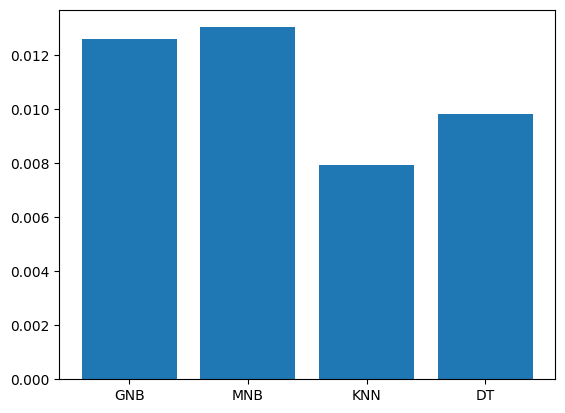

In [45]:
_gnb = GaussianNB()
_mnb = MultinomialNB()
_knn = KNeighborsClassifier()
_dt = DecisionTreeClassifier()

gnb_train_time = %timeit -n100 -r1  -o _gnb.fit(X_train, y_train)
mnb_train_time = %timeit -n100 -r1  -o _mnb.fit(X_train, y_train)
knn_train_time = %timeit -n100 -r1  -o _knn.fit(X_train, y_train)
dt_train_time = %timeit  -n100 -r1 -o _dt.fit(X_train, y_train)
print('[+] GNB : ', gnb_train_time.average)
print('[+] MNB : ', mnb_train_time.average)
print('[+] KNN : ', knn_train_time.average)
print('[+] DT : ', dt_train_time.average)

arr_result = [gnb_train_time.average, mnb_train_time.average, knn_train_time.average, dt_train_time.average]
plt.bar(['GNB', 'MNB', 'KNN', 'DT'], arr_result)


1.68 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
557 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
24.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
907 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
[+] GNB :  0.0016827609399979338
[+] MNB :  0.0005571173999987878
[+] KNN :  0.024789695810000012
[+] DT :  0.0009067136600015147


<BarContainer object of 4 artists>

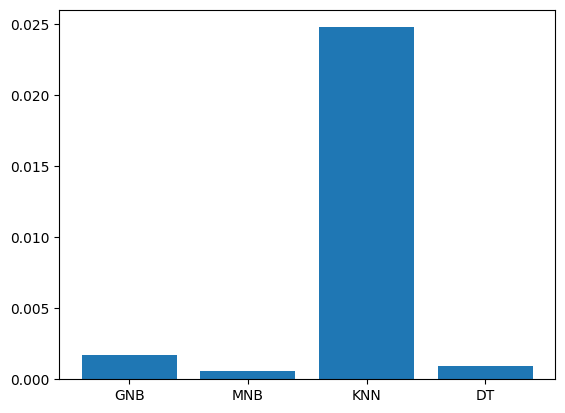

In [46]:
gnb_predict_time = %timeit -n100 -r1  -o _gnb.predict(X_test)
mnb_predict_time = %timeit -n100 -r1  -o _mnb.predict(X_test)
knn_predict_time = %timeit -n100 -r1  -o _knn.predict(X_test)
dt_predict_time = %timeit  -n100 -r1 -o _dt.predict(X_test)
print('[+] GNB : ', gnb_predict_time.average)
print('[+] MNB : ', mnb_predict_time.average)
print('[+] KNN : ', knn_predict_time.average)
print('[+] DT : ', dt_predict_time.average)

arr_result = [gnb_predict_time.average, mnb_predict_time.average, knn_predict_time.average, dt_predict_time.average]
plt.bar(['GNB', 'MNB', 'KNN', 'DT'], arr_result)
